In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import os
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import itertools
import collections
import string
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist

In [2]:
df_n = pd.read_csv("fisier_fara_diacritice.csv")
df_n.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15764\2585839718.py:1: DtypeWarning: Columns (13,37,38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_n = pd.read_csv("fisier_fara_diacritice.csv")


,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99,959",98.29,NaN
1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,...,NaN,NaN,Coronavirus-vs-VitaminaC,NaN,NaN,NaN,NaN,"66,009",17.33,NaN
2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"57,998",31.76,NaN
3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"53,994",268.63,NaN
4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"52,881",13.21,NaN


In [3]:
df_n['year'] = pd.DatetimeIndex(df_n['Post Created Date']).year
df_n['month'] = pd.DatetimeIndex(df_n['Post Created Date']).month
df_n['date'] =  pd.to_datetime(df_n['Post Created Date']).dt.strftime('%Y-%m-%d')

df_n['month_year'] = pd.to_datetime(df_n['Post Created Date']).dt.to_period('M')
df_n= df_n[df_n['Message'].notna()]
print(df_n)

       Post Created Date                               Page Name  \
0             2020-03-24                          Floriana Jucan   
1             2020-03-11                       Dr. Mihail Pautov   
2             2020-03-16                          Codin Maticiuc   
3             2020-03-15               Sarbatori alaturi de tine   
4             2020-03-11  Ministerul Afacerilor Interne, Romania   
...                  ...                                     ...   
950446        2022-06-30                         stiripesurse.ro   
950447        2022-06-30                              pesurse.ro   
950448        2022-06-30                   Sinteza Zilei Oficial   
950449        2022-06-30                                Antena 3   
950450        2022-06-30                                   Ea.md   

                  User Name       Facebook Id            Page Category  \
0          iamflorianajucan   100044342683507               JOURNALIST   
1              doctormihail   34064

In [4]:
stop_words = stopwords.words("romanian")


# Define punctuation
exclude = set(string.punctuation)

# Clean the data
def clean(text):
    # Convert text to lowercase and remove stopwords
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop_words])
    
    # Remove numbers
    num_free = ''.join(ch for ch in stop_free if not ch.isdigit())
    
    # Remove punctuation
    punc_free = ''.join(ch for ch in num_free if ch not in exclude)
    
    # Return the cleaned text
    return punc_free

# Apply cleaning function to each item in the column 'Message'
df_n['clean_post'] = df_n['Message'].apply(clean)

In [5]:
text_doc = pd.read_csv("text.csv")

In [6]:
text_doc = text_doc.dropna()

In [7]:
text_doc = text_doc.astype(str)

In [8]:
import spacy

nlp = spacy.load("ro_core_news_sm")

In [9]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

In [10]:
df_n['lemmatized_text'] = df_n['clean_post'].apply(lemmatize_text)
df_n['lemmatized_text'].head()

0    sie jos costum cravat presedint imbraca echipa...
1    vitamină c   său intampla aprobare incepere st...
2    bine crede acesta mam nascut   aproape implini...
3    arată medic muncă greu salvare vietă bolnav co...
4    rugam sprijiniti distribuire acest recomandare...
Name: lemmatized_text, dtype: object

In [11]:
# Sentiment extraction

In [12]:
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

In [13]:
df_results = pd.DataFrame(sentimentScore(df_n['clean_post']))
df_n=pd.merge(df_n, df_results, left_index=True, right_index=True)
df_n.set_index('Post Created Date', inplace=True)

In [14]:
df_n.head()

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,year,month,date,month_year,clean_post,lemmatized_text,neg,neu,pos,compound
Post Created Date,,,,,,,,,,,,,,,,,,,,,
2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,2020-03-24 16:25:54 EET,...,2020,3,2020-03-24,2020-03,sia jos costumul cravata presedinte imbracat e...,sie jos costum cravat presedint imbraca echipa...,0.000,1.000,0.000,0.000
2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,2020-03-11 17:52:32 EET,...,2020,3,2020-03-11,2020-03,vitamina c sa intamplat aprobarea inceperea s...,vitamină c său intampla aprobare incepere st...,0.000,1.000,0.000,0.000
2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,2020-03-16 12:04:25 EET,...,2020,3,2020-03-16,2020-03,bine cred asta mam nascut aproape implinisem ...,bine crede acesta mam nascut aproape implini...,0.031,0.963,0.006,-0.875
2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,2020-03-15 20:28:11 EET,...,2020,3,2020-03-15,2020-03,arata medic munca grea salvarea vietii bolnavi...,arată medic muncă greu salvare vietă bolnav co...,0.000,1.000,0.000,0.000
2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,2020-03-11 15:21:04 EET,...,2020,3,2020-03-11,2020-03,rugam sprijiniti distribuirea acestor recomand...,rugam sprijiniti distribuire acest recomandare...,0.000,1.000,0.000,0.000


In [15]:
df_n['polarity']=(df_n.pos-df_n.neg)/(df_n.pos+df_n.neg)

C:\Users\dell\AppData\Local\Temp\ipykernel_15764\3782029770.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plot['compound'], hist = True)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


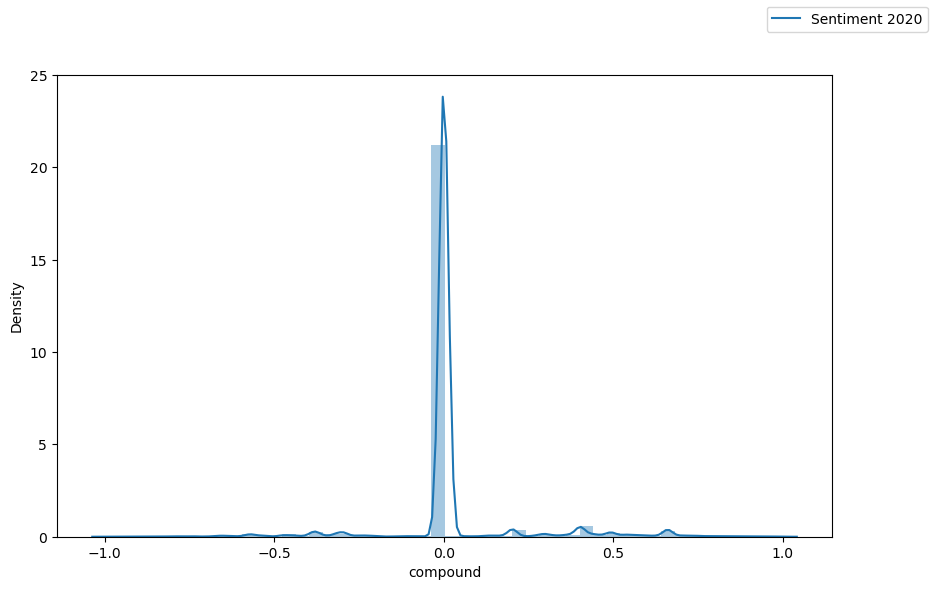

C:\Users\dell\AppData\Local\Temp\ipykernel_15764\3782029770.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plot['compound'], hist = True)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


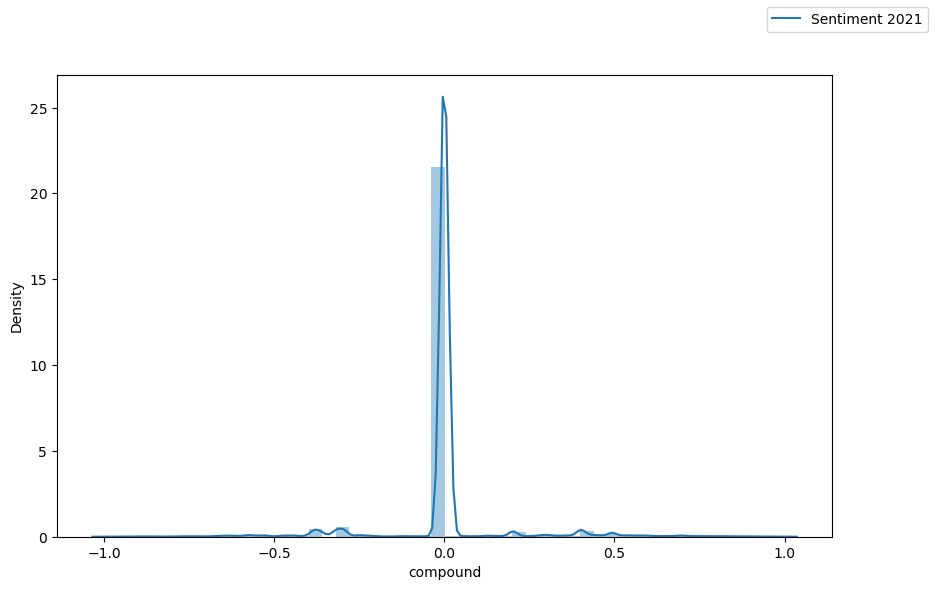

C:\Users\dell\AppData\Local\Temp\ipykernel_15764\3782029770.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plot['compound'], hist = True)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


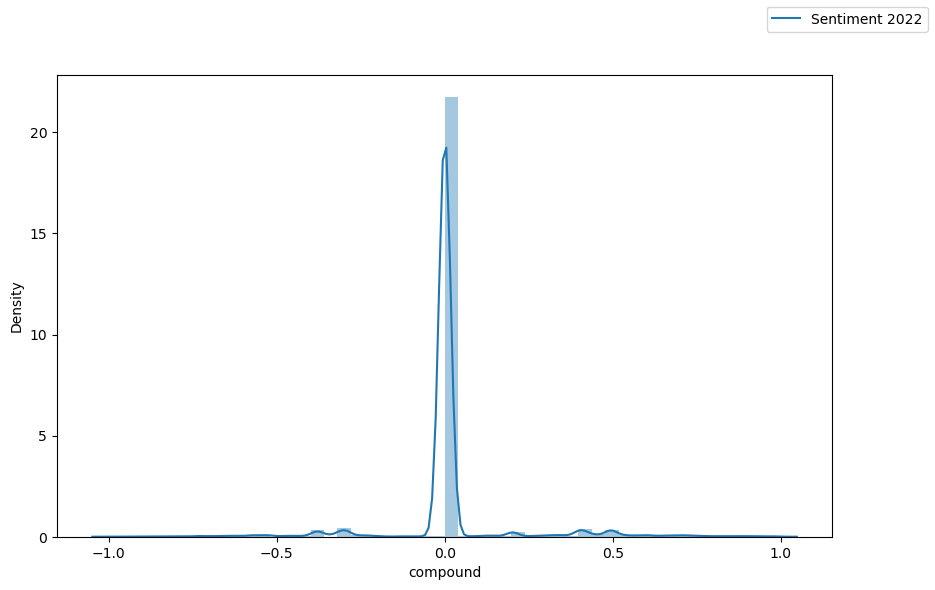

In [16]:
# plot sentiment distribution by year

import seaborn as sns
for year in df_n.year.unique():
    fig = plt.figure(figsize=(10,6))
    label = "Sentiment "+str(year)
    plot=df_n.loc[df_n['year'] == year]
    sns.distplot(plot['compound'], hist = True)
    fig.legend(labels=["Sentiment "+str(year)])
    plt.show()

In [17]:

df_n.index = pd.to_datetime(df_n.index)
sentiment=df_n['compound'].resample("M").mean()
polarity=df_n['polarity'].resample("M").mean()

In [18]:
sentiment = sentiment.fillna(0)
polarity = polarity.fillna(0)

In [19]:
sentiment

Post Created Date
2020-03-31    0.039781
2020-04-30    0.040015
2020-05-31    0.038593
2020-06-30    0.031143
2020-07-31    0.016928
2020-08-31    0.012481
2020-09-30    0.014443
2020-10-31    0.015103
2020-11-30    0.009497
2020-12-31    0.003673
2021-01-31   -0.003308
2021-02-28    0.002202
2021-03-31   -0.000838
2021-04-30    0.002410
2021-05-31    0.007006
2021-06-30    0.009823
2021-07-31    0.008093
2021-08-31    0.006587
2021-09-30   -0.001970
2021-10-31   -0.004271
2021-11-30    0.000174
2021-12-31    0.005021
2022-01-31    0.000358
2022-02-28    0.006319
2022-03-31    0.017179
2022-04-30    0.030306
2022-05-31    0.039743
2022-06-30    0.053429
Freq: M, Name: compound, dtype: float64

In [20]:
polarity.to_csv("polarity.csv")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


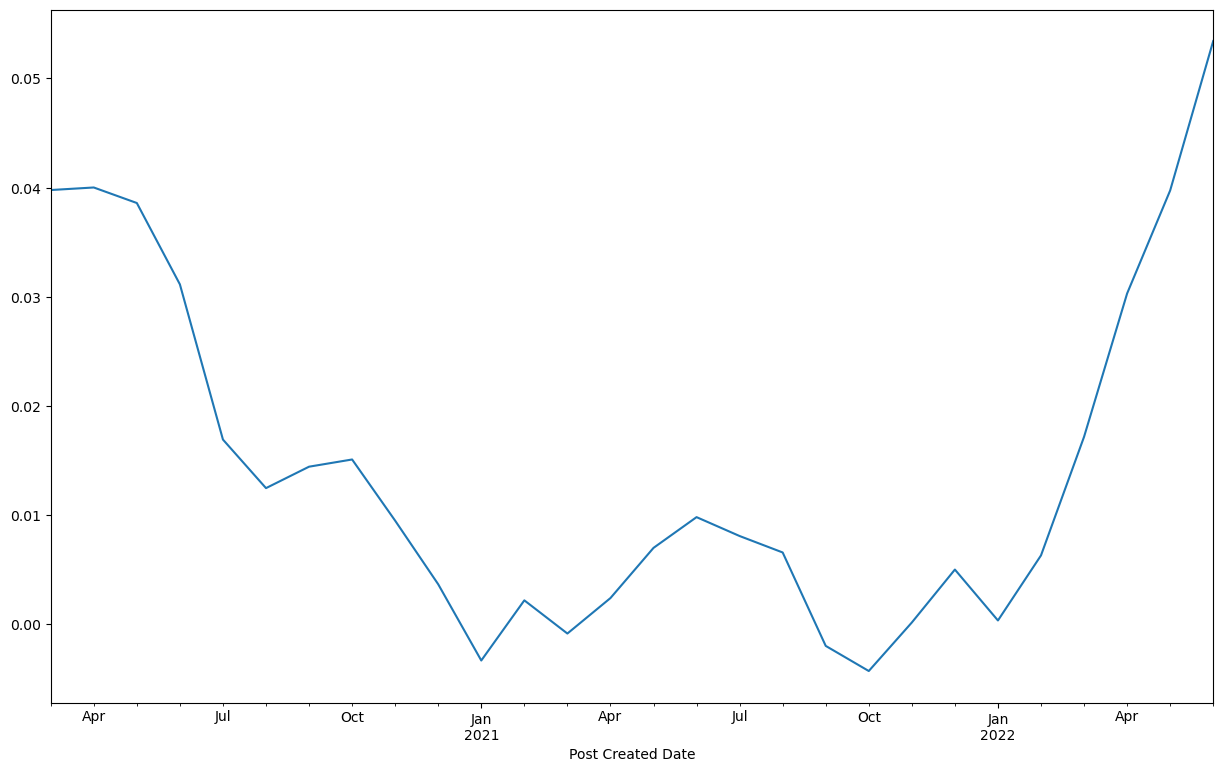

In [21]:
#import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline


pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(0.0, 2.0)

sentiment.plot()
plt.show()

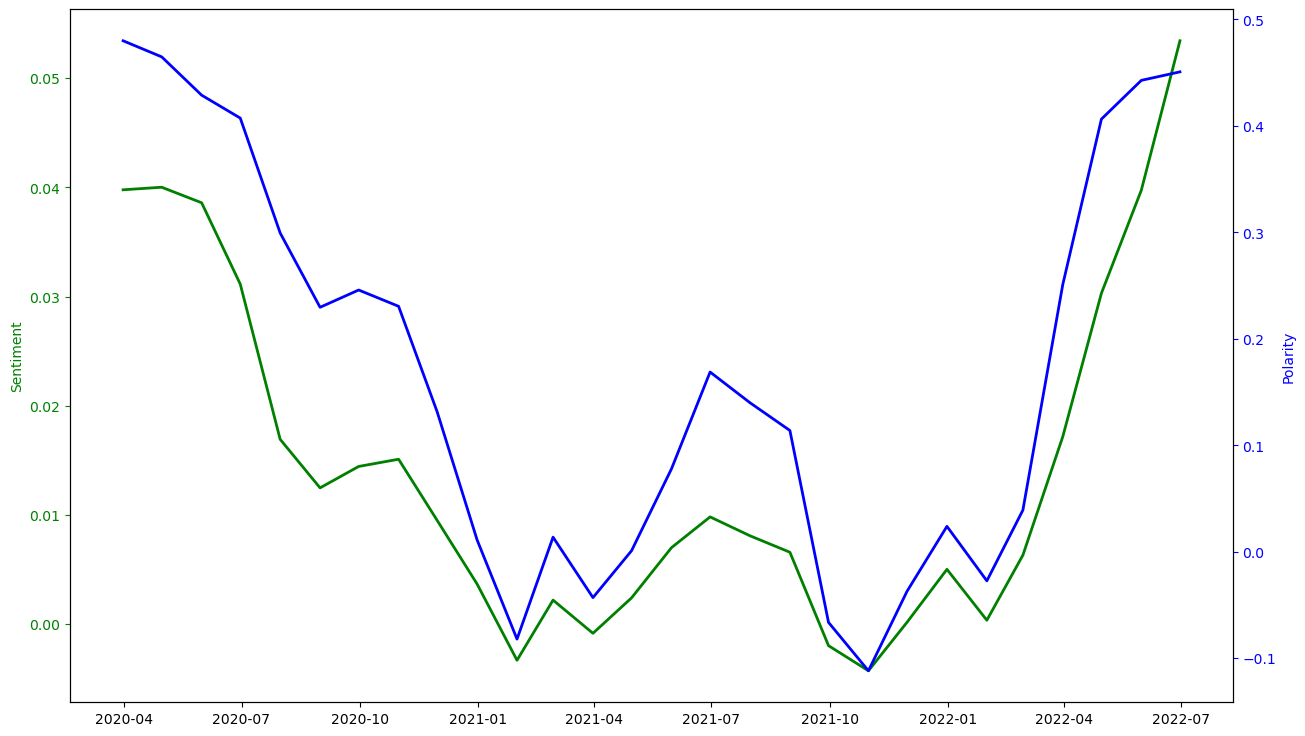

In [22]:
import matplotlib.pyplot as plt   # Import matplotlib

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline

#pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plotting the first dataset with primary y-axis
#ax1.set_ylim(0.0, 2.0)  # Set the limit for primary y-axis
ax1.plot(sentiment, 'g-', linewidth=2, label='Sentiment')  # Primary y-axis
ax1.set_ylabel('Sentiment', color='g')
ax1.tick_params('y', colors='g')
#ax1.legend(loc='upper left')

# Create a second y-axis for the same x-axis
ax2 = ax1.twinx()
ax2.plot(polarity, 'b-', linewidth=2, label='Polarity')  # Secondary y-axis
ax2.set_ylabel('Polarity', color='b')  # Add a label to the secondary y-axis
ax2.tick_params('y', colors='b')
#ax2.legend(loc='upper right')
# Save the plot with a transparent background
plt.savefig('sentiment.png', transparent=True, bbox_inches='tight')

plt.show()  # Show the plot
plt.show()  # Show the plot


In [23]:
# Covid cases

In [24]:
cov = pd.read_excel("Data/Cazuri_COVID_RO.xlsx")
cov

,Date,total,new_cases
0,2020-03-24,576,143
1,2020-03-25,762,186
2,2020-03-26,906,144
3,2020-03-27,1029,123
4,2020-03-28,1292,263
...,...,...,...
824,2022-06-26,2915487,0
825,2022-06-27,2919461,3974
826,2022-06-28,2919461,0
827,2022-06-29,2919461,0


In [25]:
cov.set_index('Date', inplace=True)

In [26]:
cov.index = pd.to_datetime(cov.index)
cov_m=cov['new_cases'].resample("M").sum()

In [27]:
cov_m.to_csv("cov_m.csv")

In [28]:
data=pd.merge(sentiment,  cov_m, left_index=True, right_index=True)

data=pd.merge(data,  polarity, left_index=True, right_index=True)
data

,compound,new_cases,polarity
Post Created Date,,,
2020-03-31,0.039781,1519,0.479918
2020-04-30,0.040015,10026,0.464790
2020-05-31,0.038593,7155,0.428824
2020-06-30,0.031143,7449,0.407311
2020-07-31,0.016928,23009,0.299427
2020-08-31,0.012481,37194,0.229601
2020-09-30,0.014443,38629,0.245835
2020-10-31,0.015103,110172,0.230529
2020-11-30,0.009497,235950,0.131300


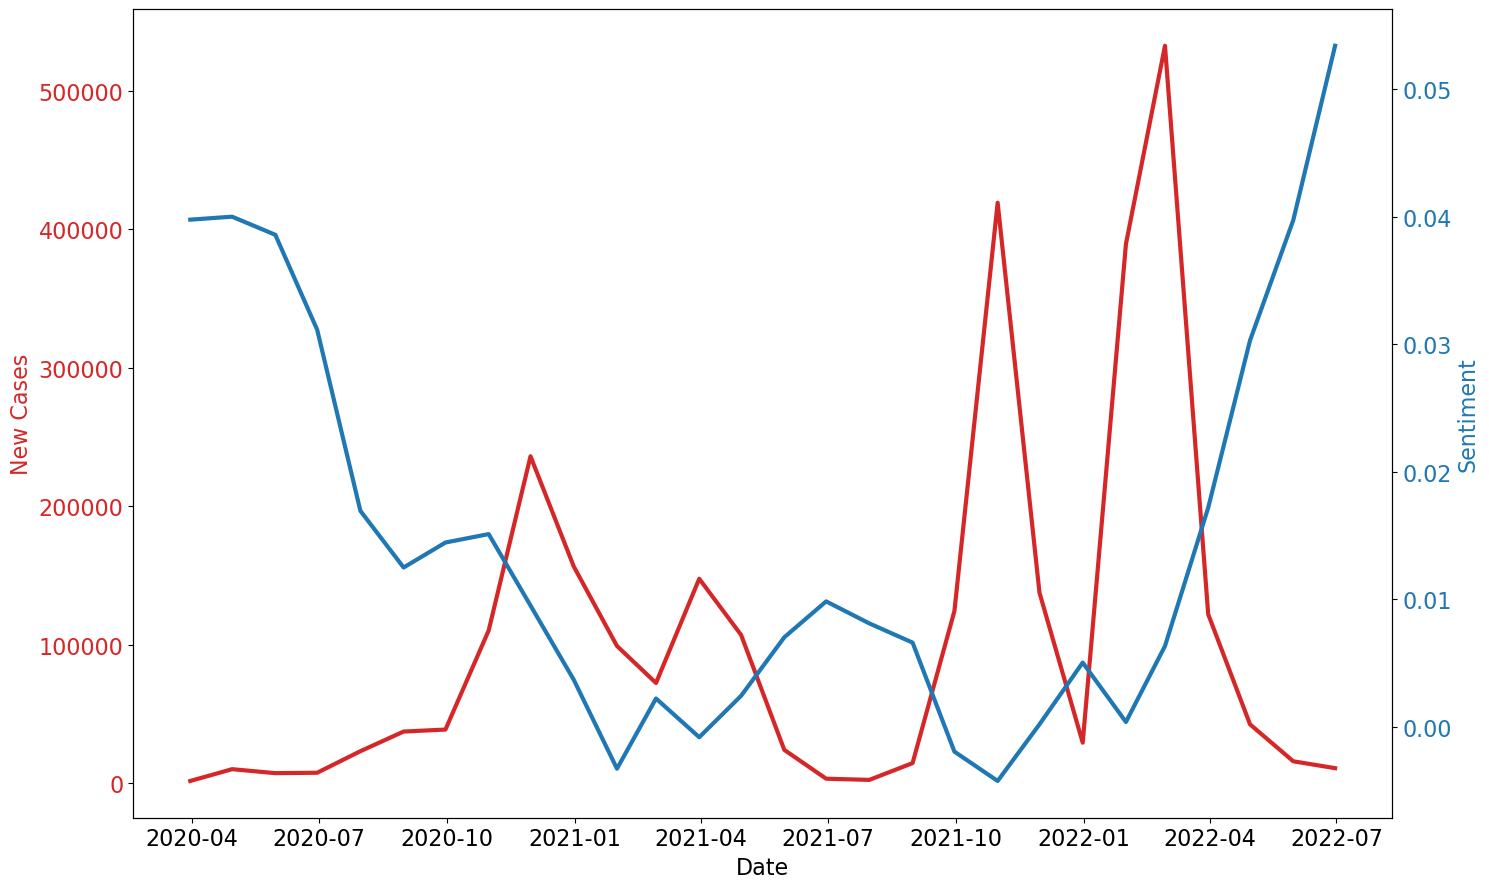

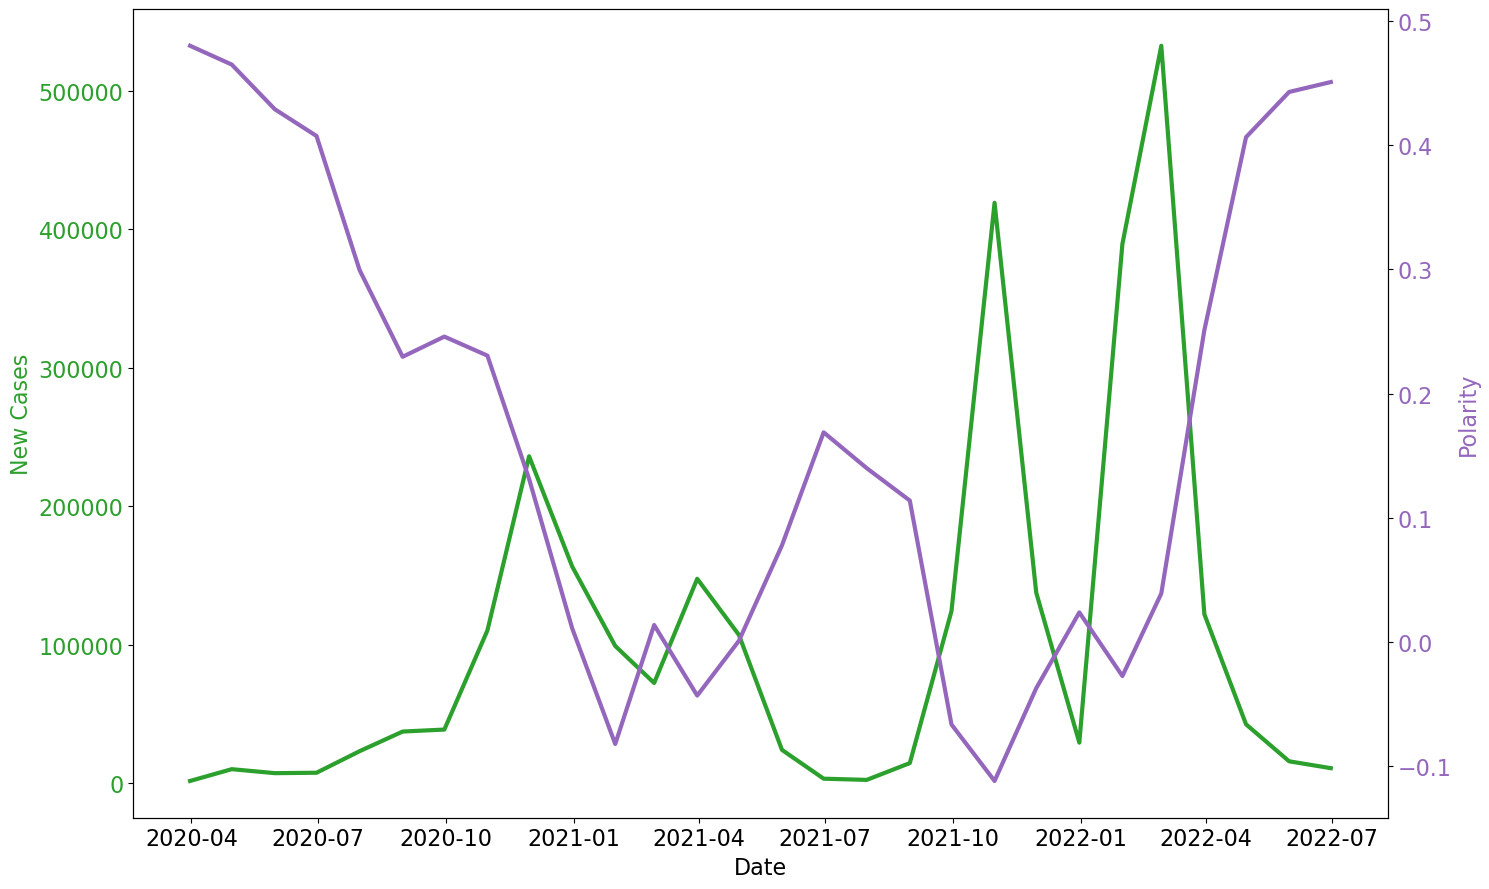

In [29]:
# Define the font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 16



# Now let's plot the charts
fig, ax1 = plt.subplots()

# Chart 1: New Cases and Sentiment
color = 'tab:red'
ax1.set_xlabel('Date',fontsize=label_fontsize)
ax1.set_ylabel('New Cases', color=color, fontsize=label_fontsize)
ax1.plot( data['new_cases'], color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color,labelsize=ticks_fontsize)
ax1.tick_params(axis='x',labelsize=ticks_fontsize)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color, fontsize=label_fontsize)  # we already handled the x-label with ax1
ax2.plot(data['compound'], color=color,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color,labelsize=ticks_fontsize)

fig.tight_layout()  # to ensure the right y-label is not slightly clipped
#plt.title('New COVID-19 Cases and Sentiment Over Time')
plt.savefig('New COVID-19 Cases and Sentiment Over Time.png', transparent=True, bbox_inches='tight')
plt.show()

# Preparing the second chart, we will use the same 'data' DataFrame
fig, ax1 = plt.subplots()

# Chart 2: New Cases and Polarity
color = 'tab:green'
ax1.set_xlabel('Date',fontsize=label_fontsize)
ax1.set_ylabel('New Cases', color=color,fontsize=label_fontsize)
ax1.plot( data['new_cases'], color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=ticks_fontsize)
ax1.tick_params(axis='x',labelsize=ticks_fontsize)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:purple'
ax2.set_ylabel('Polarity', color=color, fontsize=label_fontsize)  # we already handled the x-label with ax1
ax2.plot( data['polarity'], color=color,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color, labelsize=ticks_fontsize)

fig.tight_layout()  # to ensure the right y-label is not slightly clipped
plt.savefig('New COVID-19 Cases and Polarity Over Time.png', transparent=True, bbox_inches='tight')
#plt.title('New COVID-19 Cases and Polarity Over Time')
plt.show()


In [30]:
# TextBlob

In [31]:
from textblob import TextBlob

In [32]:
 df_n['clean_post'].head()

Post Created Date
2020-03-24    sia jos costumul cravata presedinte imbracat e...
2020-03-11    vitamina c  sa intamplat aprobarea inceperea s...
2020-03-16    bine cred asta mam nascut  aproape implinisem ...
2020-03-15    arata medic munca grea salvarea vietii bolnavi...
2020-03-11    rugam sprijiniti distribuirea acestor recomand...
Name: clean_post, dtype: object

In [33]:
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        return 'Positive'
    elif sentiment_polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [34]:
df_n['TextBlob Sentiment'] = df_n['clean_post'].apply(get_sentiment_textblob)
print(df_n.head())

                                                Page Name  \
Post Created Date                                           
2020-03-24                                 Floriana Jucan   
2020-03-11                              Dr. Mihail Pautov   
2020-03-16                                 Codin Maticiuc   
2020-03-15                      Sarbatori alaturi de tine   
2020-03-11         Ministerul Afacerilor Interne, Romania   

                             User Name      Facebook Id  \
Post Created Date                                         
2020-03-24            iamflorianajucan  100044342683507   
2020-03-11                doctormihail  340640989728926   
2020-03-16              codin.maticiuc  100050227700665   
2020-03-15           sarbatoriimpreuna  100064316577159   
2020-03-11         ministeruldeinterne  100069007606112   

                             Page Category Page Admin Top Country  \
Post Created Date                                                   
2020-03-24          

In [35]:
def get_num_textblob(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    return sentiment_polarity

In [36]:
df_n['TextBlob'] = df_n['clean_post'].apply(get_num_textblob)
print(df_n.head())

                                                Page Name  \
Post Created Date                                           
2020-03-24                                 Floriana Jucan   
2020-03-11                              Dr. Mihail Pautov   
2020-03-16                                 Codin Maticiuc   
2020-03-15                      Sarbatori alaturi de tine   
2020-03-11         Ministerul Afacerilor Interne, Romania   

                             User Name      Facebook Id  \
Post Created Date                                         
2020-03-24            iamflorianajucan  100044342683507   
2020-03-11                doctormihail  340640989728926   
2020-03-16              codin.maticiuc  100050227700665   
2020-03-15           sarbatoriimpreuna  100064316577159   
2020-03-11         ministeruldeinterne  100069007606112   

                             Page Category Page Admin Top Country  \
Post Created Date                                                   
2020-03-24          

In [38]:
df_n.index = pd.to_datetime(df_n.index)


In [39]:
sentiment=df_n['TextBlob'].resample("M").mean()

In [40]:
sentiment.head()

Post Created Date
2020-03-31    0.029358
2020-04-30    0.024086
2020-05-31    0.027764
2020-06-30    0.025500
2020-07-31    0.019585
Freq: M, Name: TextBlob, dtype: float64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


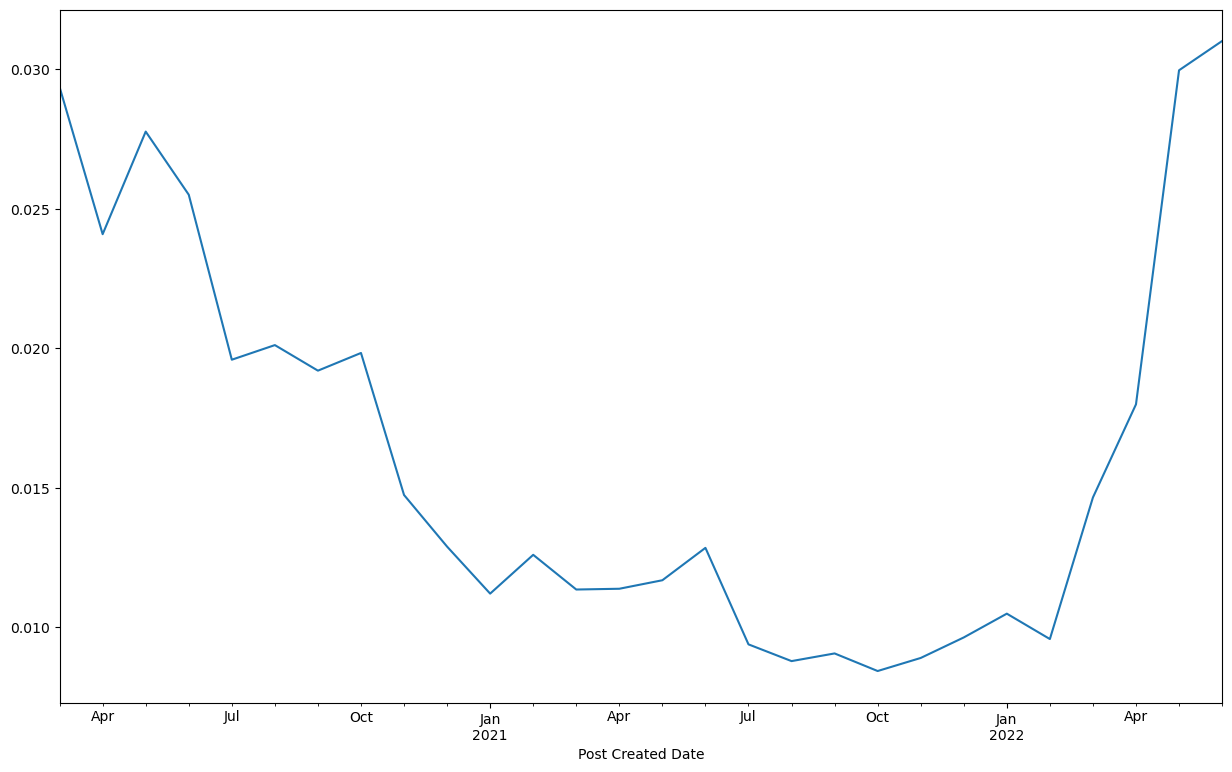

In [41]:
#import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline


pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(0.0, 2.0)

sentiment.plot()
plt.show()

# Regression

In [42]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
#data=pd.merge(sentiment,  cov_m, left_index=True, right_index=True)
data.head()

,compound,new_cases,polarity
Post Created Date,,,
2020-03-31,0.039781,1519,0.479918
2020-04-30,0.040015,10026,0.464790
2020-05-31,0.038593,7155,0.428824
2020-06-30,0.031143,7449,0.407311
2020-07-31,0.016928,23009,0.299427


In [44]:
max = data['new_cases'].max()
min=data['new_cases'].min()

data['cases_normalizat']=(data['new_cases']-min)/(max-min)

In [ ]:
data.head()

In [45]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "compound ~ cases_normalizat", data=data).fit()


In [46]:
from statsmodels.iolib.summary2 import summary_col
print (summary_col(lm,stars=True,float_format='%0.2f',
                  model_names=['p4\n(0)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)}))


                    p4   
                   (0)   
-------------------------
Intercept        0.02*** 
                 (0.00)  
cases_normalizat -0.03***
                 (0.01)  
R-squared        0.23    
R-squared Adj.   0.20    
N                28      
R2               0.23    
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


In [47]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargazer = Stargazer([lm])

HTML(stargazer.render_html())


# LDA

In [48]:
from gensim.models.ldamulticore import LdaMulticore

In [ ]:
#! pip install pyLDAvis

In [49]:
import pandas as pd
import gensim
from gensim import corpora, models
import pyLDAvis
from gensim.models import LdaModel

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [50]:
 df_n['clean_post'].head()

Post Created Date
2020-03-24    sia jos costumul cravata presedinte imbracat e...
2020-03-11    vitamina c  sa intamplat aprobarea inceperea s...
2020-03-16    bine cred asta mam nascut  aproape implinisem ...
2020-03-15    arata medic munca grea salvarea vietii bolnavi...
2020-03-11    rugam sprijiniti distribuirea acestor recomand...
Name: clean_post, dtype: object

In [51]:
df_split = pd.DataFrame()
df_split =  df_n['clean_post']
df_split.head()

Post Created Date
2020-03-24    sia jos costumul cravata presedinte imbracat e...
2020-03-11    vitamina c  sa intamplat aprobarea inceperea s...
2020-03-16    bine cred asta mam nascut  aproape implinisem ...
2020-03-15    arata medic munca grea salvarea vietii bolnavi...
2020-03-11    rugam sprijiniti distribuirea acestor recomand...
Name: clean_post, dtype: object

In [53]:
#clean the data
stop = set(stopwords.words('romanian'))
exclude = set(string.punctuation)

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    nb_free = ''.join((x for x in stop_free if not x.isdigit()))
    punc_free = ''.join(ch for ch in nb_free if ch not in exclude)
    normalized = ' '.join([word for word in punc_free.split()])
   
    return normalized.split()

In [54]:
df_split['split_post'] =df_split.apply(clean)

In [55]:
df_split['split_post'].head()


Post Created Date
2020-03-24    [sia, jos, costumul, cravata, presedinte, imbr...
2020-03-11    [vitamina, c, intamplat, aprobarea, inceperea,...
2020-03-16    [bine, cred, mam, nascut, aproape, implinisem,...
2020-03-15    [arata, medic, munca, grea, salvarea, vietii, ...
2020-03-11    [rugam, sprijiniti, distribuirea, acestor, rec...
Name: clean_post, dtype: object

In [56]:
#create dictionary
dictionary = corpora.Dictionary(df_split['split_post'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

28264137


In [57]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_split['split_post']]
print(len(doc_term_matrix))

949314


In [58]:
lda = gensim.models.LdaModel

In [59]:
num_topics=3
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=30,minimum_probability=0)

CPU times: total: 2h 20min 23s
Wall time: 2h 27min 57s


In [60]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.027*"lei" + 0.026*"zile" + 0.012*"persoana" + 0.012*"covid" + 0.010*"camera" + 0.009*"euro" + 0.008*"tariful" + 0.007*"hotel" + 0.006*"test" + 0.006*"perioada"'),
 (1,
  '0.022*"covid" + 0.005*"romania" + 0.005*"anticovid" + 0.004*"ani" + 0.004*"impotriva" + 0.003*"vaccin" + 0.003*"acum" + 0.003*"facut" + 0.003*"timp" + 0.003*"trebuie"'),
 (2,
  '0.055*"covid" + 0.039*"cazuri" + 0.030*"persoane" + 0.024*"ore" + 0.024*"ultimele" + 0.014*"decese" + 0.012*"pacienti" + 0.011*"coronavirus" + 0.010*"teste" + 0.010*"judetul"')]

In [61]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

In [62]:
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [63]:

pyLDAvis.save_html(vis, 'lda.html')